In [2]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import matplotlib.pyplot as plt
import json

In [3]:
data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')

In [3]:
Pe=0.1
DO2 = 7.63596e-6
w = 30e-6
U_0   = Pe*DO2/w
print(f"inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"reference air flux:0.24~1.90 m3/(m2 min)  ")

inlet velocity: 0.025453200000000002 m/s
air flux: 1.527192 m3/(m2 min) 
reference air flux:0.24~1.90 m3/(m2 min)  


## Plots min max fields

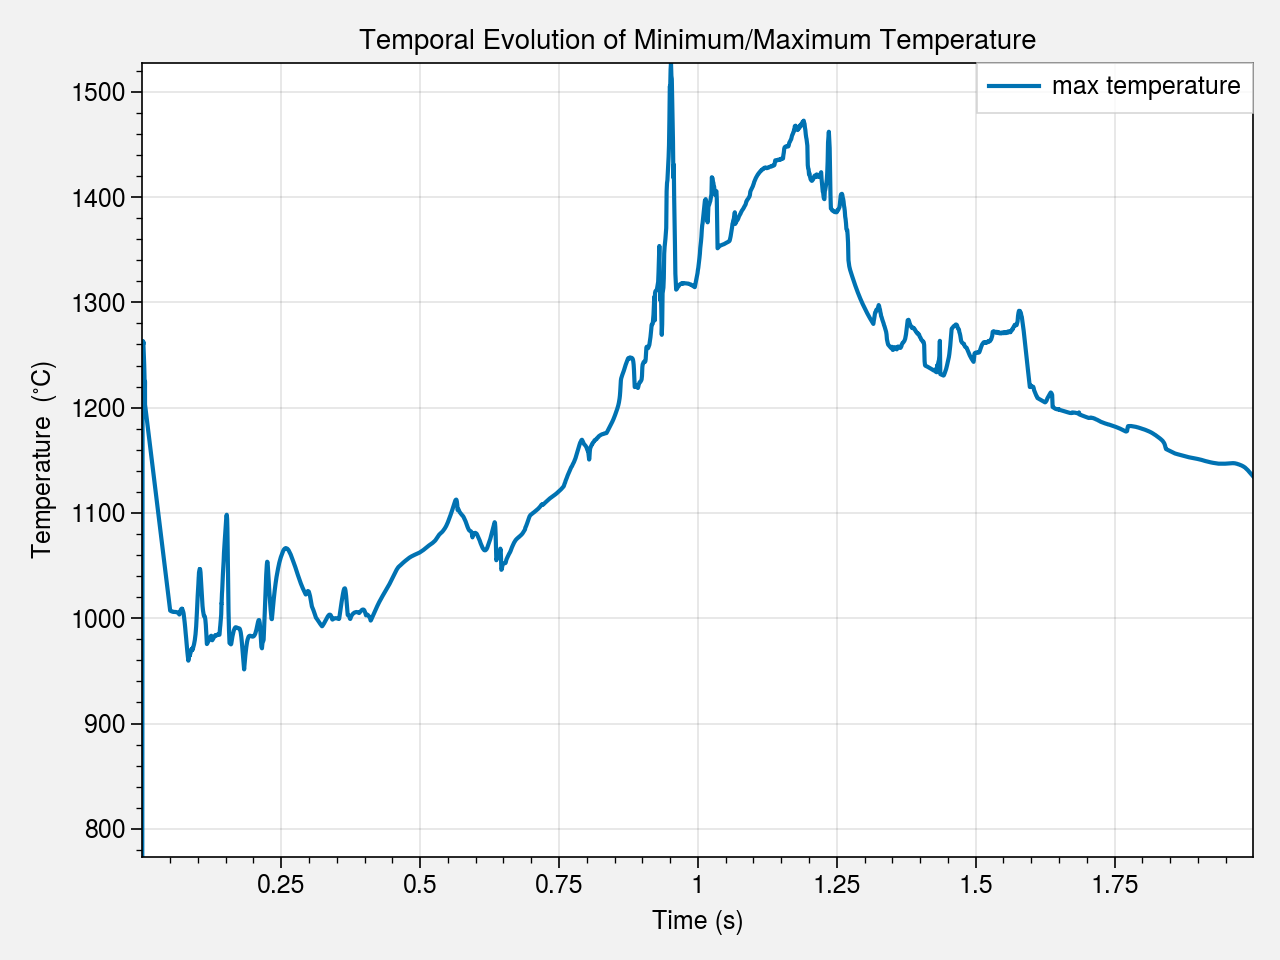

In [3]:
fieldminMaxFile="../postProcessing/minMaxComponents/fieldMinMax.dat"
pyFigure.plot_max_temperature(fieldminMaxFile,10)

## Show Contours

In [4]:
fields=["eps"]
# fields=["eps","UNorm","O2Conc","Qdot","T"]
times=[]
script=f"{WM_PROJECT_USER_DIR}/utilities/postProcess/pyFigure.py"
cmd=f"python3 {script} -f '{json.dumps(fields)}' -d {data_folder} -s {save_folder} -t '{json.dumps(times)}'"
os.system(cmd)

0

In [8]:
import math
math.ceil(20/8)

3

In [11]:
data=range(0, 20, 1)
print(list(data))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [13]:
[data[x:x+3] for x in range(0, len(data), 3)]

[range(0, 3),
 range(3, 6),
 range(6, 9),
 range(9, 12),
 range(12, 15),
 range(15, 18),
 range(18, 20)]

In [14]:
# fields=["eps","UNorm","O2Conc","Qdot","T"]
# xranges={"Qdot":{"vmin":0,"vmax":0},
#          "T":{"vmin":0,"vmax":0}}
# time_instant="0.001" 
# pyFigure.read_plot_multiple_contourf_save(data_folder,fields,time_instant,save_folder,xranges)

In [15]:
# df1=pyFigure.read_data_and_process(data_folder,"0.18")
# title=f"porosity contour at {pyFigure.time_str(0.18)}"
# pyFigure.plot_contourf(df1,"eps",title,label='porosity')

## imprvement:
### computations:
1.  did the computation fluctuation is related to the numerical convergence issue: used time control and monitor the unconvergened pimple loop 
2. use the same heat capacity for more stable temperature computation
3. the result close to the entry may be not reasonable due to the effect of the specified B.C.: stop computation early?
### Images:
1. support the data range specifiction
2. extract the common function, like read minmaxTemperature
3. develop sum functionObjs
4. test postProcess on HPC
5. draw with pplots

### Animations: 
1. same data range for one field
2. try ffme 

## explore:
- Pe range: 1e-3,1e-2,1e-1,1,5 : submit more cases
- did the oxygen break through the domain before all the coke was consumped up: plot the outlet oxygen conc  and the residual coke fraction
- the peak of maximum temperature occurred at the oxygen breakthrough:plot the outlet oxygen conc  and the maximum temperature